In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import os

## 平行生產指令

In [3]:
part = 3 # 一個角度分割成幾個 part
N = 100 # 每個 part的 data數量
exp = 0 # 基於何種實驗( DUNE = 0, T2HK = 1, DUNE+T2HK = -1)
select_angle = [5,10,15,20,25,30,155,160,165,170,175] # 選擇哪些角度
for angle in select_angle: # 選擇哪些角度
    for index in range(part):
        print("nohup "+"./poisson" + " " + str(angle) + " " + str(N) + " " + str(exp) + " " + str(index+1)+" > 0911.log &")

nohup ./poisson 5 100 0 1 > 0911.log &
nohup ./poisson 5 100 0 2 > 0911.log &
nohup ./poisson 5 100 0 3 > 0911.log &
nohup ./poisson 10 100 0 1 > 0911.log &
nohup ./poisson 10 100 0 2 > 0911.log &
nohup ./poisson 10 100 0 3 > 0911.log &
nohup ./poisson 15 100 0 1 > 0911.log &
nohup ./poisson 15 100 0 2 > 0911.log &
nohup ./poisson 15 100 0 3 > 0911.log &
nohup ./poisson 20 100 0 1 > 0911.log &
nohup ./poisson 20 100 0 2 > 0911.log &
nohup ./poisson 20 100 0 3 > 0911.log &
nohup ./poisson 25 100 0 1 > 0911.log &
nohup ./poisson 25 100 0 2 > 0911.log &
nohup ./poisson 25 100 0 3 > 0911.log &
nohup ./poisson 30 100 0 1 > 0911.log &
nohup ./poisson 30 100 0 2 > 0911.log &
nohup ./poisson 30 100 0 3 > 0911.log &
nohup ./poisson 155 100 0 1 > 0911.log &
nohup ./poisson 155 100 0 2 > 0911.log &
nohup ./poisson 155 100 0 3 > 0911.log &
nohup ./poisson 160 100 0 1 > 0911.log &
nohup ./poisson 160 100 0 2 > 0911.log &
nohup ./poisson 160 100 0 3 > 0911.log &
nohup ./poisson 165 100 0 1 > 0911.lo

In [ ]:
for angle in select_angle:
    for index in range(part):
        #path = "./two_delta_chi2_distribution_angle315/two_delta_chi2_distribution_angle315_part" + str(index+1) + ".dat"
        path = "./two_delta_chi2_distribution_DUNE_angle175/two_delta_chi2_distribution_DUNE_angle"+str(angle)+"_part" + str(index+1) + ".dat"

In [ ]:
#總資料組數
N = 5000
part = 3
q_0N = []
q_piN = []
q_0I = []
q_piI = []
q_cpv = []
for angle in select_angle:
    for index in range(part):
        #path = "./two_delta_chi2_distribution_angle315/two_delta_chi2_distribution_angle315_part" + str(index+1) + ".dat"
        path = "/globes-3.2.18/examples/two_delta_chi2_distribution_DUNE_angle175/two_delta_chi2_distribution_DUNE_angle"+str(angle)+"_part" + str(index+1) + ".dat"
        f = open(path)
        for i in range(N):
            s = f.readline().split()
            array = []
            for j in range(len(s)) :
                array.append(float(s[j]))
            q_0N.append(array[0])
            q_piN.append(array[1]) 
            q_0I.append(array[2])
            q_piI.append(array[3]) 
            q_cpv.append(array[4])
    np.savez("two_delta_chi2_distribution_DUNE_angle175_15K",
             q_0N = q_0N,
             q_piN = q_piN,
             q_0I = q_0I,
             q_piI = q_piI,
             q_cpv = q_cpv)

# 4種

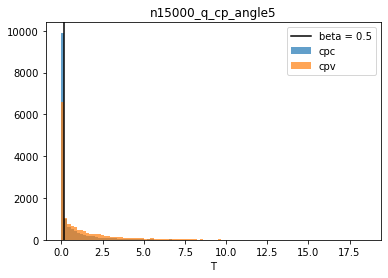

pvalue = 0.3393333333333333
chi = 0.4142832672916449
chi_square = 0.17163062555784048


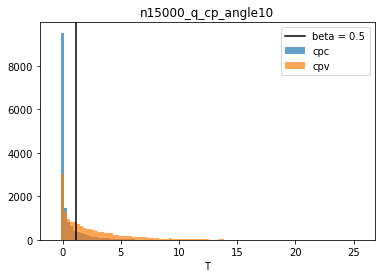

pvalue = 0.14486666666666667
chi = 1.0587067927766782
chi_square = 1.1208600730714804


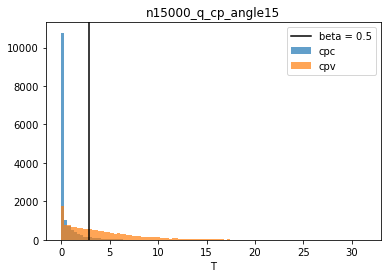

pvalue = 0.048666666666666664
chi = 1.6579213940603694
chi_square = 2.7487033488830788


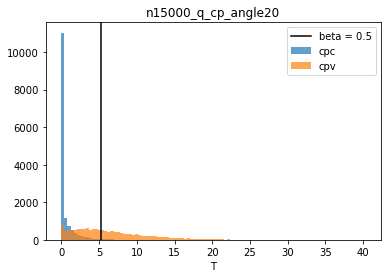

pvalue = 0.0104
chi = 2.311595225503251
chi_square = 5.343472486569425


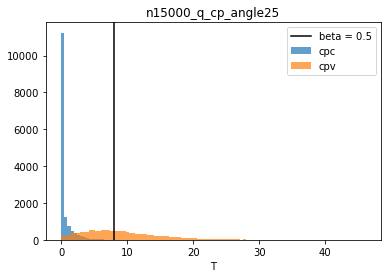

pvalue = 0.0023333333333333335
chi = 2.8291853268535294
chi_square = 8.004289613683312


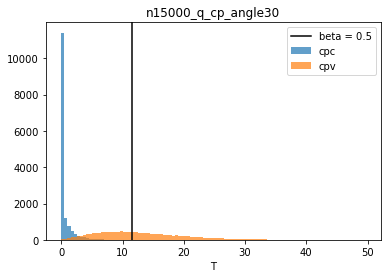

pvalue = 0.0003333333333333333
chi = 3.402932835385336
chi_square = 11.579951882143682


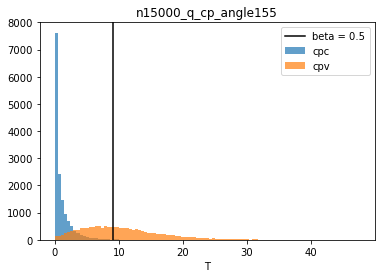

pvalue = 0.0033333333333333335
chi = 2.71305188847271
chi_square = 7.360650549545339


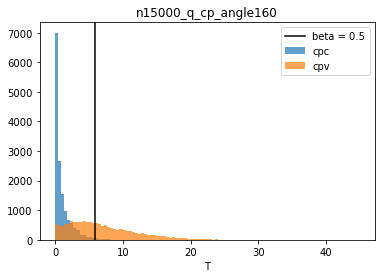

pvalue = 0.015466666666666667
chi = 2.1579292449315695
chi_square = 4.656658626130933


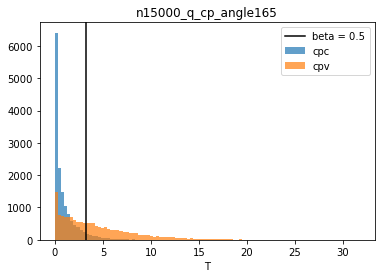

pvalue = 0.0714
chi = 1.4654433409948722
chi_square = 2.1475241856662133


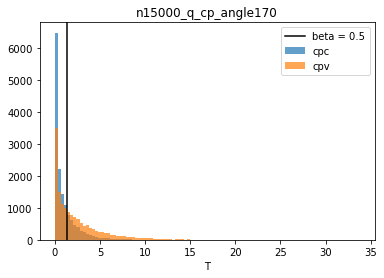

pvalue = 0.252
chi = 0.6682092997257234
chi_square = 0.44650366823994164


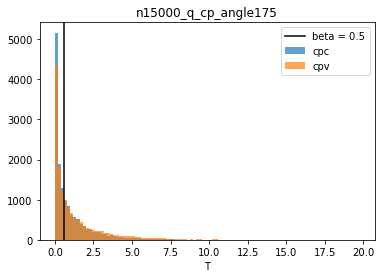

pvalue = 0.4428
chi = 0.14387395827044133
chi_square = 0.020699715868404692


In [13]:
chi_square_list = []
for angle in [5,10,15,20,25,30]:
    data = np.load('two_delta_chi2_distribution_DUNE_angle{}_15K.npz'.format(angle))  #From Globes ./poisson
    a = data['q_0N']
    b = data['q_cpv']

    bins = np.linspace(min(a), max(b), 100)
    numa = len(a)
    numb = len(b)
    abin = plt.hist(a, bins=bins, alpha=0.7, label='cpc')
    bbin = plt.hist(b, bins=bins, alpha=0.7, label='cpv')
    cut = 0.50

    suma = 0
    for i, aval in enumerate(abin[0]):
        suma += aval
        if suma/numa >= 1-cut:
            acut = i
            break
    # plt.axvline(abin[1][acut], c='k')

    sumb = 0
    for i, bval in enumerate(bbin[0]):
        sumb += bval
        if sumb/numb >= cut:
            bcut = i
            break
    plt.axvline(bbin[1][bcut], c='k', label = 'beta = 0.5')

    plt.xlabel('T')
    plt.legend()
    plt.title('n15000_q_cp_angle{}'.format(angle))
    plt.show()
    pvalue = sum(abin[0][bcut:])/sum(abin[0])
    print('pvalue =', pvalue)
    chi = scipy.special.erfinv((1-2*pvalue))*np.sqrt(2)
    print('chi =', chi)
    chi_square = chi**2
    print('chi_square =', chi_square)
    chi_square_list.append(chi_square)

for angle in [155,160,165,170,175]:
    data = np.load('two_delta_chi2_distribution_DUNE_angle{}_15K.npz'.format(angle))
    a = data['q_piN']
    b = data['q_cpv']

    bins = np.linspace(min(a), max(b), 100)
    numa = len(a)
    numb = len(b)
    abin = plt.hist(a, bins=bins, alpha=0.7, label='cpc')
    bbin = plt.hist(b, bins=bins, alpha=0.7, label='cpv')
    cut = 0.50

    suma = 0
    for i, aval in enumerate(abin[0]):
        suma += aval
        if suma/numa >= 1-cut:
            acut = i
            break
    # plt.axvline(abin[1][acut], c='k')

    sumb = 0
    for i, bval in enumerate(bbin[0]):
        sumb += bval
        if sumb/numb >= cut:
            bcut = i
            break
    plt.axvline(bbin[1][bcut], c='k', label = 'beta = 0.5')

    plt.xlabel('T')
    plt.legend()
    plt.title('n15000_q_cp_angle{}'.format(angle))
    plt.show()
    pvalue = sum(abin[0][bcut:])/sum(abin[0])
    print('pvalue =', pvalue)
    chi = scipy.special.erfinv((1-2*pvalue))*np.sqrt(2)
    print('chi =', chi)
    chi_square = chi**2
    print('chi_square =', chi_square)
    chi_square_list.append(chi_square)

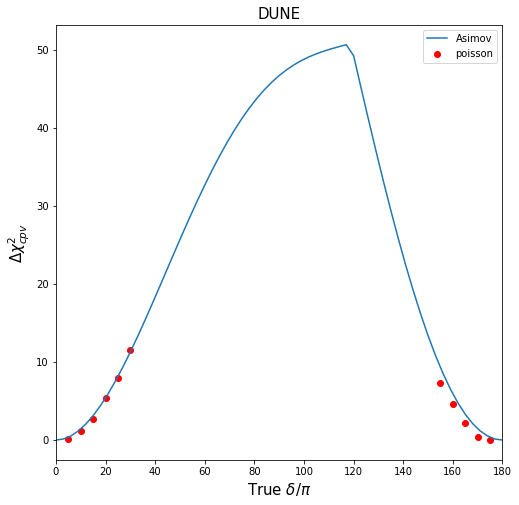

In [14]:
lines = np.load('cpv_sensitivity_globes.npz')  #From Globes ./sample_chi
plt.figure(figsize=(8,8))
plt.plot(lines['delta_cp'], lines['OFF_DU'], label = 'Asimov')
plt.scatter([i for i in [5,10,15,20,25,30,155,160,165,170,175]], chi_square_list, c='r', label='poisson')
plt.xlim(0,180)
# plt.ylim(0,15)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2_{cpv} $', fontsize=15)
plt.title('DUNE', fontsize=15)
plt.legend()
plt.show()